# Spam Detector

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Retrieve the Data

The data is located at [https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv](https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv)

Dataset Source: [UCI Machine Learning Library](https://archive.ics.uci.edu/dataset/94/spambase)

Import the data using Pandas. Display the resulting DataFrame to confirm the import was successful.

In [30]:
# Import the data
data = pd.read_csv("https://static.bc-edx.com/ai/ail-v-1-0/m13/challenge/spam-data.csv")
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


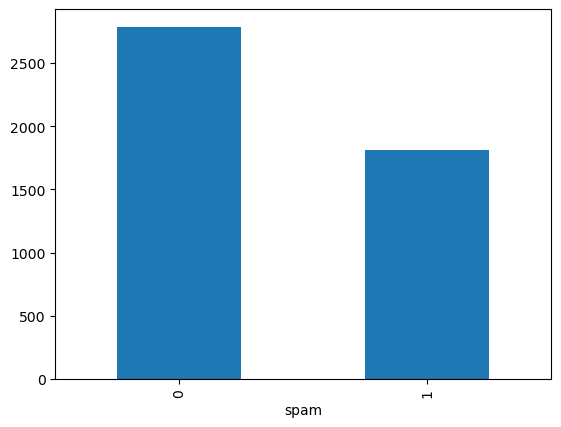

In [31]:
# Plot the data distribution
import matplotlib.pyplot as plt
data['spam'].value_counts().plot(kind='bar')
plt.show()


<Axes: >

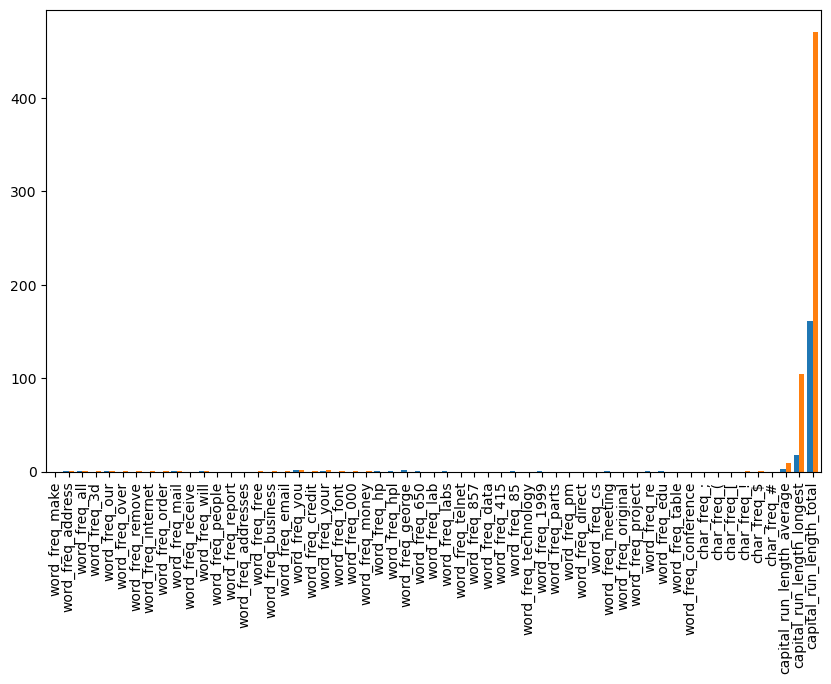

In [32]:
# Plot each feature on the same chart, summing the spam and ham counts for each feature
data.groupby('spam').mean().T.plot(kind='bar', figsize=(10, 6), width=0.8, legend=False)

## Predict Model Performance

You will be creating and comparing two models on this data: a Logistic Regression, and a Random Forests Classifier. Before you create, fit, and score the models, make a prediction as to which model you think will perform better. You do not need to be correct! 

Write down your prediction in the designated cells in your Jupyter Notebook, and provide justification for your educated guess.

*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [33]:
# Create the labels set `y` and features DataFrame `X`
X = data.copy()
X = X.drop(columns='spam')
y = data['spam']

In [34]:
# Check the balance of the labels variable (`y`) by using the `value_counts` function.
y.value_counts()

spam
0    2788
1    1813
Name: count, dtype: int64

In [35]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
3560,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.000,0.237,0.0,0.000,0.0,0.000,1.800,9,36
2589,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.000,0.120,0.0,0.241,0.0,0.000,3.541,26,85
3062,0.17,0.00,0.35,0.0,0.53,0.0,0.0,0.35,0.0,0.00,...,0.0,0.071,0.143,0.0,0.000,0.0,0.000,2.464,80,244
4435,0.00,0.00,0.59,0.0,0.00,0.0,0.0,0.00,0.0,0.29,...,0.0,0.039,0.235,0.0,0.471,0.0,0.039,3.659,70,333
3083,0.00,14.28,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.800,5,9


## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [36]:
from sklearn.preprocessing import StandardScaler

# Scale the training data

# Create the StandardScaler instance, fit the X_train data, and scale the X_train data
X_train_scaled = StandardScaler().fit_transform(X_train)
X_train_scaled

array([[-0.3369032 , -0.16086868, -0.55645688, ..., -0.10292387,
        -0.20172365, -0.41944653],
       [-0.3369032 , -0.16086868, -0.55645688, ..., -0.05095328,
        -0.12556581, -0.33571889],
       [ 0.21400676, -0.16086868,  0.13446251, ..., -0.08310281,
         0.11634733, -0.06403126],
       ...,
       [-0.3369032 , -0.16086868, -0.55645688, ..., -0.08701329,
        -0.19724378, -0.39723307],
       [-0.3369032 ,  0.02077676, -0.55645688, ..., -0.10841646,
        -0.18380416, -0.18535089],
       [-0.01283851, -0.16086868,  0.25290583, ..., -0.09949101,
        -0.11212619,  0.09829784]])

In [37]:
# Scale the testing data
X_test_scaled = StandardScaler().fit_transform(X_test)
X_test_scaled

array([[-0.35415899, -0.17333304, -0.55743887, ..., -0.14675744,
        -0.40204608, -0.43899306],
       [ 2.02356094, -0.17333304,  0.86540032, ..., -0.14560557,
        -0.39356532, -0.39416225],
       [-0.35415899, -0.17333304,  1.2662001 , ..., -0.13523878,
        -0.35116152, -0.28440407],
       ...,
       [-0.35415899, -0.17333304, -0.55743887, ..., -0.04229762,
         0.08983799, -0.19628834],
       [-0.35415899, -0.17333304, -0.55743887, ..., -0.14675744,
        -0.40204608, -0.43899306],
       [-0.35415899,  0.08076739, -0.55743887, ..., -0.13217914,
        -0.28331544, -0.29367941]])

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [38]:
# Train a Logistic Regression model and print the model score
from sklearn.linear_model import LogisticRegression

# Create the LogisticRegression model and fit it to the training data (X_train and y_train)
log_reg_model = LogisticRegression(max_iter=100, solver='lbfgs', random_state=42) 
log_reg_model.fit(X_train_scaled, y_train)
# Score the model
print(f"Training Data Score: {log_reg_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {log_reg_model.score(X_test_scaled, y_test)}")


Training Data Score: 0.927319922128488
Testing Data Score: 0.9216589861751152


In [39]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = log_reg_model.predict(X_test_scaled)

# Review the predictions
testing_predictions


array([0, 0, 0, ..., 1, 0, 1])

In [40]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
log_reg_accuracy_score = accuracy_score(y_test, testing_predictions)
log_reg_accuracy_score

0.9216589861751152

## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [41]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=500, random_state=42).fit(X_train_scaled, y_train)

# Evaluate the model
print(f'Training Score: {random_forest_model.score(X_train_scaled, y_train)}')
print(f'Testing Score: {random_forest_model.score(X_test_scaled, y_test)}')


Training Score: 0.999675535366645
Testing Score: 0.9328505595786701


In [42]:
# Make and save testing predictions with the saved RandomForest model using the test data
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Review the predictions
random_forest_predictions

array([0, 0, 0, ..., 1, 0, 1])

In [43]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.
random_forest_model_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_model_accuracy

0.9328505595786701

## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

In [44]:
# Print the accuracy scores of the two models for use in analysis/summary

print("LogisticRegression Accuracy", log_reg_accuracy_score)
print("RandomForest Accuracy Score", random_forest_model_accuracy)

LogisticRegression Accuracy 0.9216589861751152
RandomForest Accuracy Score 0.9328505595786701


# My analysis
The RandomForest model performed better overall. 

1. While scaling data for RandomForest isn't necessary, it may help with more accurately computing predictions. These predictions are then fed into the accuracy score. Since the accuracy score is higher for the RandomForest model than LogisticRegression, we could reasonably infer it would perform better at predictions.

2. LogisticRegression models perform well for datasets with linear data. However, the data doesn't show a linear relationship. To the contrary, through plotting the features, we see that there's an uneven distribution of the features.